# Alzheimer's Disease Diagnosis Prediction

<br>
<br>
<center>
  <img src="https://www.mph.com.tr/content/images/uploads/1280x768/mpgaziantep-alzheimer,514.jpg" width="950">
</center>
<br>
<br>


## Project Overview

This project aims to predict the diagnosis of Alzheimer's Disease using various machine learning methods. Alzheimer's Disease is a progressive neurological disorder that leads to memory loss, cognitive decline, and, ultimately, the inability to perform daily activities. Early and accurate diagnosis is critical for managing the disease and improving the quality of life for affected individuals.

In this project, we will utilize the [Alzheimer's Disease Dataset](https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset) from Kaggle. The dataset contains detailed information about patients, including demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, and symptoms.

### Project Goals

The primary goal of this project is to develop a machine learning model that can accurately predict whether a patient is diagnosed with Alzheimer's Disease based on the available features in the dataset. We will explore various machine learning algorithms to determine the most effective model for this prediction task.

### Dataset Overview

| Attributes                    | Description                                                                                           |
|-------------------------------|-------------------------------------------------------------------------------------------------------|
| PatientID                      | A unique identifier assigned to each patient (4751 to 6900).                                          |
| Age                            | The age of the patients ranges from 60 to 90 years.                                                   |
| Gender                         | Gender of the patients, where 0 represents Male and 1 represents Female.                              |
| Ethnicity                      | The ethnicity of the patients, coded as follows: 0: Caucasian, 1: African American, 2: Asian, 3: Other.|
| EducationLevel                 | The education level of the patients, coded as follows: 0: None, 1: High School, 2: Bachelor's, 3: Higher.|
| BMI                            | Body Mass Index of the patients, ranging from 15 to 40.                                               |
| Smoking                        | Smoking status, where 0 indicates No and 1 indicates Yes.                                             |
| AlcoholConsumption             | Weekly alcohol consumption in units, ranging from 0 to 20.                                            |
| PhysicalActivity               | Weekly physical activity in hours, ranging from 0 to 10.                                              |
| DietQuality                    | Diet quality score, ranging from 0 to 10.                                                             |
| SleepQuality                   | Sleep quality score, ranging from 4 to 10.                                                            |
| FamilyHistoryAlzheimers        | Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                      |
| CardiovascularDisease          | Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.                         |
| Diabetes                       | Presence of diabetes, where 0 indicates No and 1 indicates Yes.                                       |
| Depression                     | Presence of depression, where 0 indicates No and 1 indicates Yes.                                     |
| HeadInjury                     | History of head injury, where 0 indicates No and 1 indicates Yes.                                     |
| Hypertension                   | Presence of hypertension, where 0 indicates No and 1 indicates Yes.                                   |
| SystolicBP                     | Systolic blood pressure, ranging from 90 to 180 mmHg.                                                 |
| DiastolicBP                    | Diastolic blood pressure, ranging from 60 to 120 mmHg.                                                |
| CholesterolTotal               | Total cholesterol levels, ranging from 150 to 300 mg/dL.                                              |
| CholesterolLDL                 | Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.                             |
| CholesterolHDL                 | High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.                            |
| CholesterolTriglycerides       | Triglycerides levels, ranging from 50 to 400 mg/dL.                                                   |
| MMSE                           | Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.|
| FunctionalAssessment           | Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.          |
| MemoryComplaints               | Presence of memory complaints, where 0 indicates No and 1 indicates Yes.                              |
| BehavioralProblems             | Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.                            |
| ADL                            | Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.      |
| Confusion                      | Presence of confusion, where 0 indicates No and 1 indicates Yes.                                      |
| Disorientation                 | Presence of disorientation, where 0 indicates No and 1 indicates Yes.                                 |
| PersonalityChanges             | Presence of personality changes, where 0 indicates No and 1 indicates Yes.                            |
| DifficultyCompletingTasks      | Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.                    |
| Forgetfulness                  | Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.                                  |
| Diagnosis                      | Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.                   |
| DoctorInCharge                 | This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients. |

### Methodology

The project will follow these steps:
1. **Data Exploration and Preprocessing**: Initial analysis of the dataset, including handling missing values, encoding categorical variables, and feature scaling.
2. **Feature Selection**: Identifying the most relevant features for predicting Alzheimer's Disease.
3. **Model Selection**: Evaluating multiple machine learning models (e.g., Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, etc.) and selecting the best-performing model based on key metrics such as accuracy, precision, recall, and F1-score.
4. **Model Evaluation**: Using cross-validation techniques to assess the model's performance and ensure it generalizes well to unseen data.
5. **Conclusion**: Summarizing the findings and discussing potential implications for early diagnosis of Alzheimer's Disease.

Through this project, we aim to contribute to the ongoing efforts in leveraging machine learning for healthcare applications, particularly in the early detection and management of Alzheimer's Disease.


Let's import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from numpy import mean, std

Let's load the dataset and see.

In [2]:
alzheimer = pd.read_csv('alzheimers_disease_data.csv')

Let's look at the shape of the dataset.

In [3]:
alzheimer.shape

(2149, 35)

In [4]:
alzheimer.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Let's see if the null value exists.

In [5]:
alzheimer.isnull().sum()[alzheimer.isnull().sum() > 0]

Series([], dtype: int64)

As we can see, there are no null values. Now let's examine the types of attributes.

In [6]:
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

The observations of some attributes are either 0 or 1. Their type is int64. I will make their type category.

In [7]:
categorical_columns = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury',
    'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion',
    'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness'
]

alzheimer[categorical_columns] = alzheimer[categorical_columns].astype('category')

Let's see how many different values ​​the DoctorInCharge attribute can take.

In [8]:
alzheimer['DoctorInCharge'].duplicated().sum()

2148

In [9]:
alzheimer['DoctorInCharge'].value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

DoctorInChange takes a single value and PatientID is unique representative values. I'm going to delete these two attributes because we won't need them.

In [10]:
alzheimer.drop(['DoctorInCharge'], axis=1, inplace=True)

In [11]:
alzheimer.drop(['PatientID'], axis=1, inplace=True)

Let's look again with the changes we made.

In [12]:
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   int64   
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

## Exploring Dataset with Statistical Analysis

Before starting feature selection, let's evaluate the data set with statistical graphs and tools.

In [13]:
alzheimer.describe()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,27.655697,10.039442,4.920202,4.993138,7.051081,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,4.982958,0.353653
std,8.990221,7.217438,5.757910,2.857191,2.909055,1.763573,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,2.949775,0.478214
min,60.000000,15.008851,0.002003,0.003616,0.009385,4.002629,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.001288,0.000000
25%,67.000000,21.611408,5.139810,2.570626,2.458455,5.482997,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,2.342836,0.000000
50%,75.000000,27.823924,9.934412,4.766424,5.076087,7.115646,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,5.038973,0.000000
75%,83.000000,33.869778,15.157931,7.427899,7.558625,8.562521,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,7.581490,1.000000
max,90.000000,39.992767,19.989293,9.987429,9.998346,9.999840,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,9.999747,1.000000


Between them. I want to see the cases where the correlation is greater than 0.025 with a heat map. I will not show values of 1 because the attribute will have a correlation of 1 with itself.

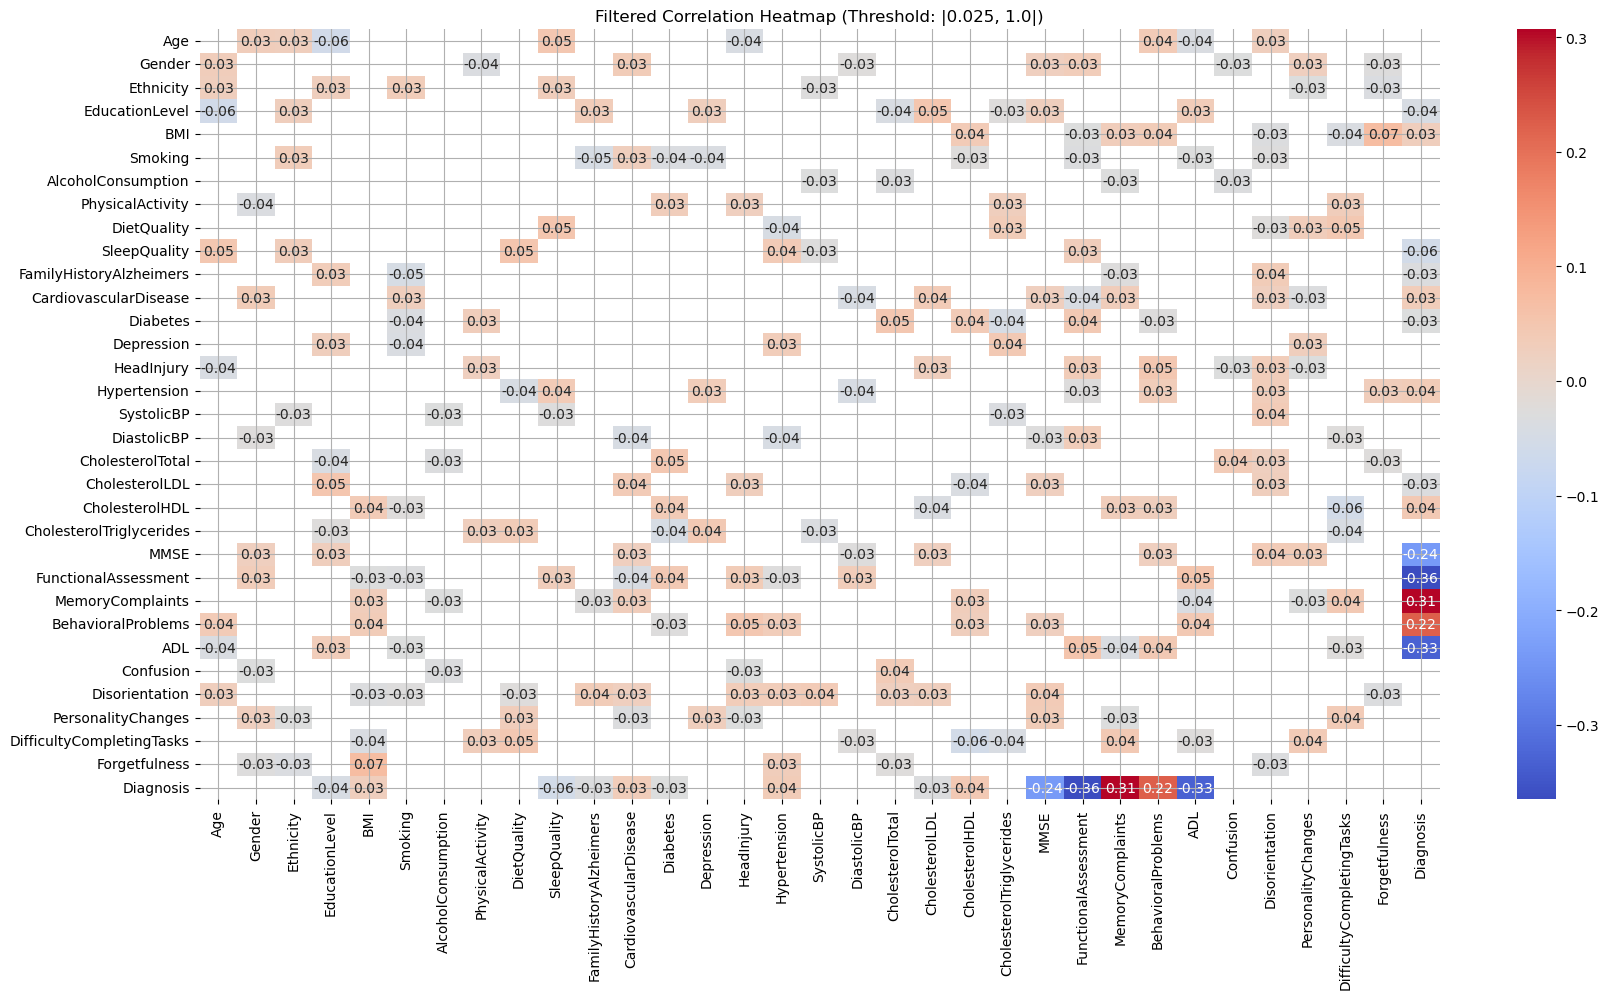

In [14]:
corr_matrix = alzheimer.corr()

# Filtering the correlation matrix to show only correlations greater than 0.025 or less than -0.025 and less than 1
filtered_corr_matrix = corr_matrix.applymap(lambda x: x if (abs(x) > 0.025 and abs(x) < 1) else None)

# Plotting the filtered heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=filtered_corr_matrix.isnull())
plt.title('Filtered Correlation Heatmap (Threshold: |0.025, 1.0|)')

plt.grid(True) 

plt.show()

With Diagnosis, we will list attributes with correlations greater than 0.025 according to the absolute value of their correlations. Because these attributes seem more related to diagnosis.

In [15]:
# Sorting the attributes by the absolute value of their correlation with 'Diagnosis'
sorted_significant_corr = corr_matrix['Diagnosis'][abs(corr_matrix['Diagnosis']) > 0.025].abs().sort_values(ascending=False)
sorted_corr_alzheimer = corr_matrix['Diagnosis'].loc[sorted_significant_corr.index].reset_index()
sorted_corr_alzheimer.columns = ['Attribute', 'Correlation with Diagnosis']

# We will remove the "Diagnosis" row because it is unnecessary to add it.
sorted_corr_alzheimer = sorted_corr_alzheimer[sorted_corr_alzheimer['Attribute'] != 'Diagnosis']

sorted_corr_alzheimer

,Attribute,Correlation with Diagnosis
1,FunctionalAssessment,-0.364898
2,ADL,-0.332346
3,MemoryComplaints,0.306742
4,MMSE,-0.237126
5,BehavioralProblems,0.224350
6,SleepQuality,-0.056548
7,EducationLevel,-0.043966
8,CholesterolHDL,0.042584
9,Hypertension,0.035080
10,FamilyHistoryAlzheimers,-0.032900


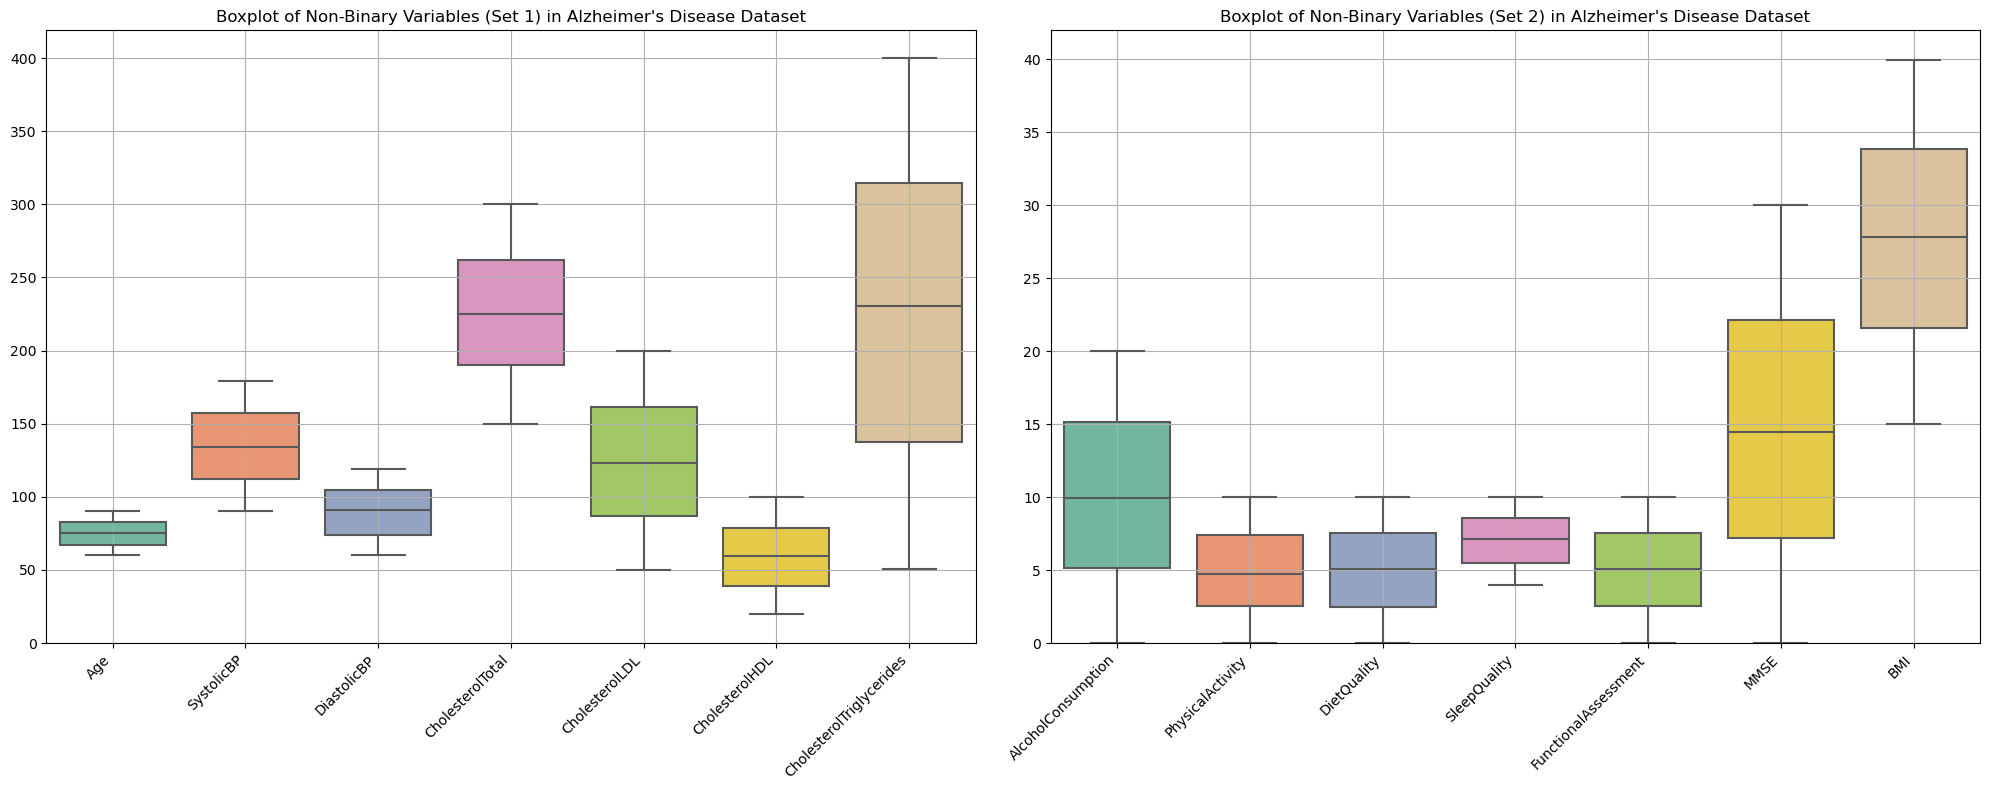

In [16]:
non_binary_columns_1 = [
    "Age", "SystolicBP", "DiastolicBP",
    "CholesterolTotal", "CholesterolLDL", "CholesterolHDL",
    "CholesterolTriglycerides"
]

non_binary_columns_2 = [
    "AlcoholConsumption", "PhysicalActivity",
    "DietQuality", "SleepQuality", "FunctionalAssessment", "MMSE", "BMI"
]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.boxplot(data=alzheimer[non_binary_columns_1], palette="Set2", ax=axes[0])
axes[0].set_title("Boxplot of Non-Binary Variables (Set 1) in Alzheimer's Disease Dataset")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(True)
axes[0].set_ylim(0, None)

sns.boxplot(data=alzheimer[non_binary_columns_2], palette="Set2", ax=axes[1])
axes[1].set_title("Boxplot of Non-Binary Variables (Set 2) in Alzheimer's Disease Dataset")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(True)
axes[1].set_ylim(0, None)

plt.tight_layout()
plt.show()

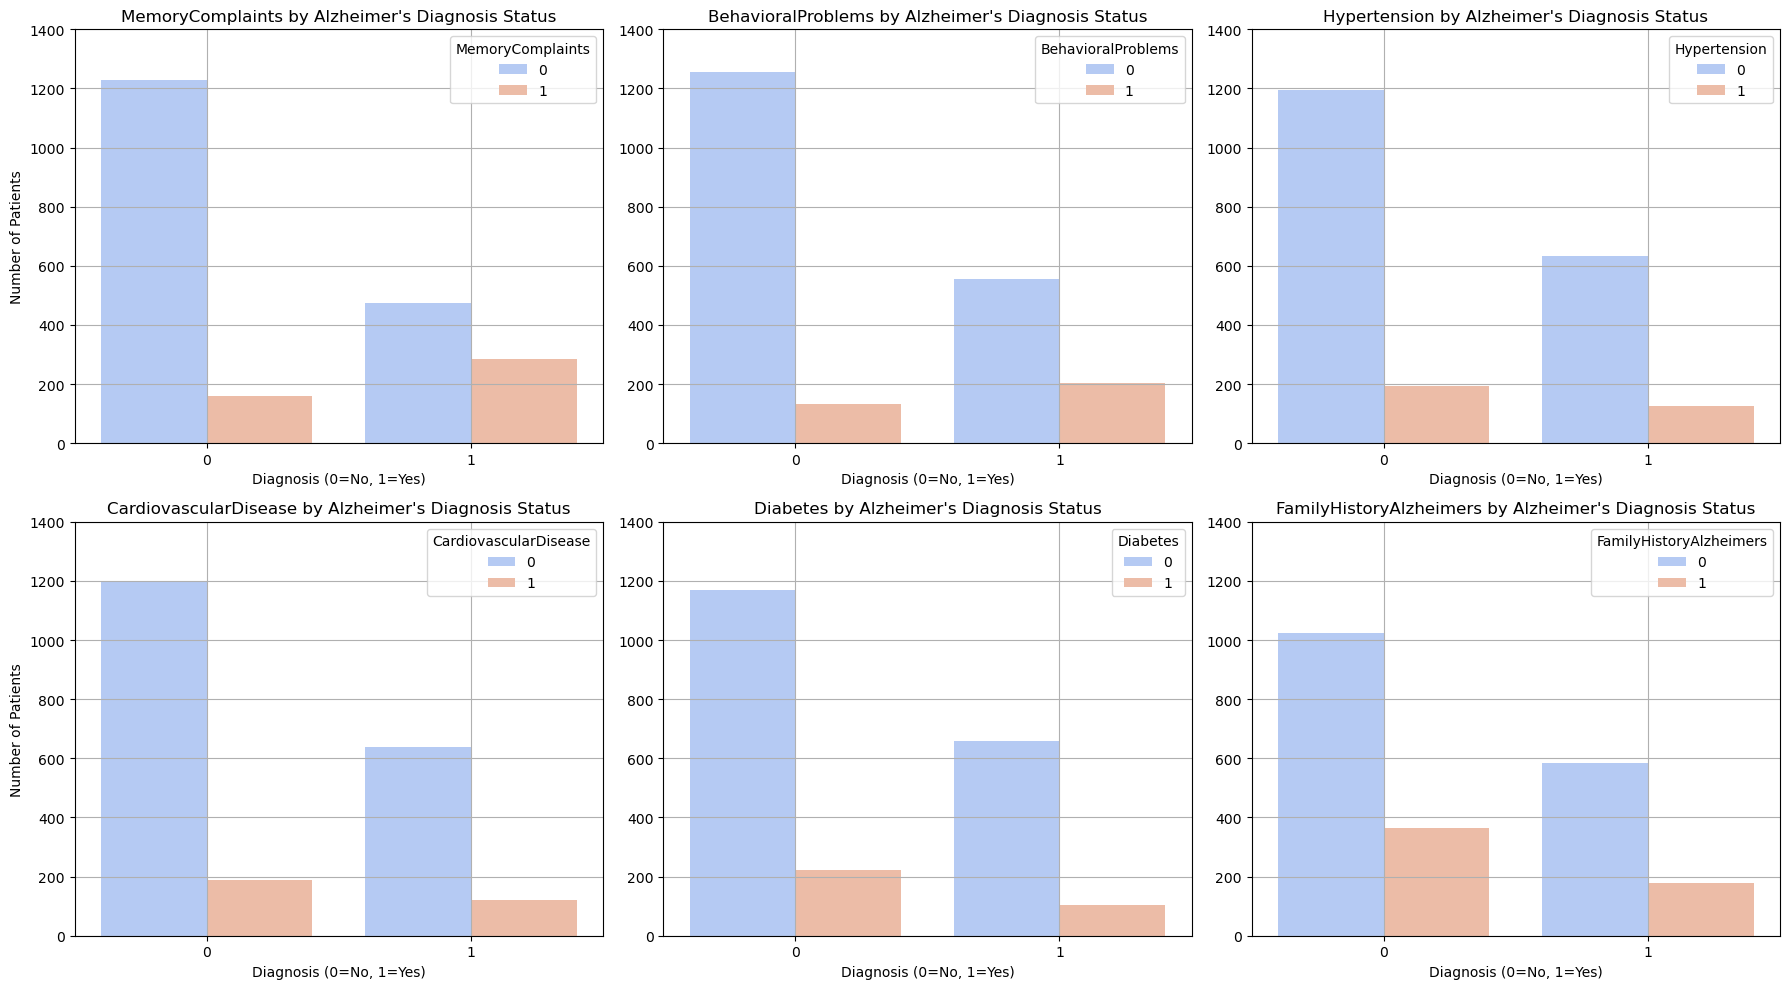

In [17]:
attributes = [
    'MemoryComplaints', 'BehavioralProblems', 'Hypertension',
    'CardiovascularDisease', 'Diabetes', 'FamilyHistoryAlzheimers'
]

plt.figure(figsize=(18, 10))

for i, attribute in enumerate(attributes):
    plt.subplot(2, 3, i + 1) 
    sns.countplot(x='Diagnosis', hue=attribute, data=alzheimer, palette='coolwarm')
    
    plt.title(f"{attribute} by Alzheimer's Diagnosis Status")
    if i % 3 == 0:
        plt.ylabel("Number of Patients")
    else:
        plt.ylabel("")
    plt.ylim(0, 1400)
    plt.xlabel("Diagnosis (0=No, 1=Yes)")
    plt.grid(True)

plt.tight_layout()
plt.show()

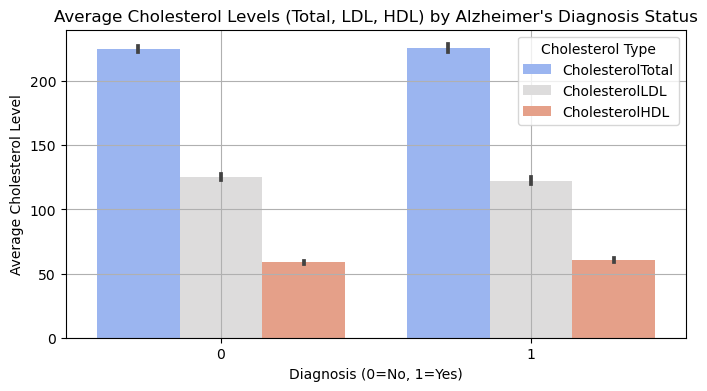

In [18]:
cholesterol_alzheimer = alzheimer.melt(id_vars=['Diagnosis'], value_vars=['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL'], 
                         var_name='Cholesterol Type', value_name='Cholesterol Level')

plt.figure(figsize=(8, 4))

sns.barplot(x='Diagnosis', y='Cholesterol Level', hue='Cholesterol Type', data=cholesterol_alzheimer, palette='coolwarm')
plt.title("Average Cholesterol Levels (Total, LDL, HDL) by Alzheimer's Diagnosis Status")
plt.xlabel("Diagnosis (0=No, 1=Yes)")
plt.ylabel("Average Cholesterol Level")
plt.grid(True)
plt.legend(title="Cholesterol Type")
plt.show()

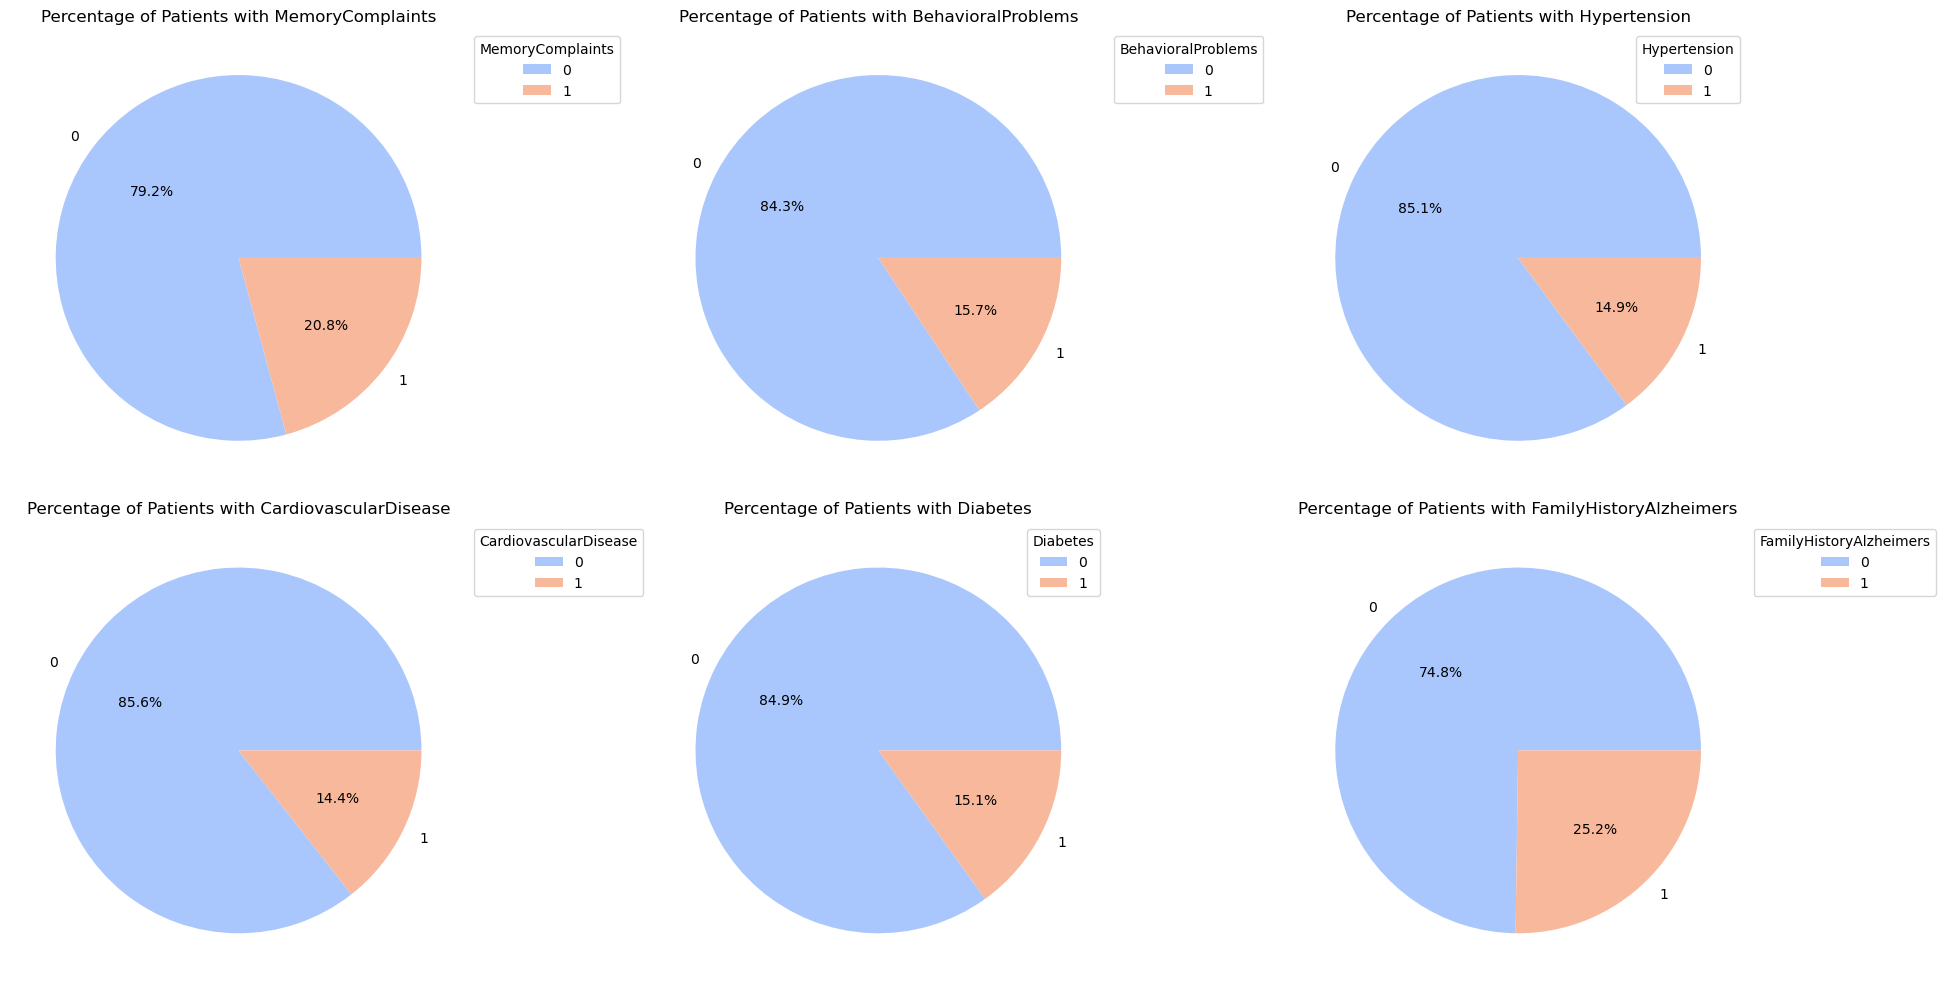

In [19]:
attributes = [
    'MemoryComplaints', 'BehavioralProblems', 'Hypertension',
    'CardiovascularDisease', 'Diabetes', 'FamilyHistoryAlzheimers'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, attribute in enumerate(attributes):
    row = i // 3
    col = i % 3
    counts = alzheimer[attribute].value_counts()
    
    axes[row, col].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                       colors=sns.color_palette("coolwarm", 2))
    axes[row, col].set_title(f"Percentage of Patients with {attribute.replace('_', ' ')}")
    axes[row, col].legend(title=f"{attribute}", loc="best", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

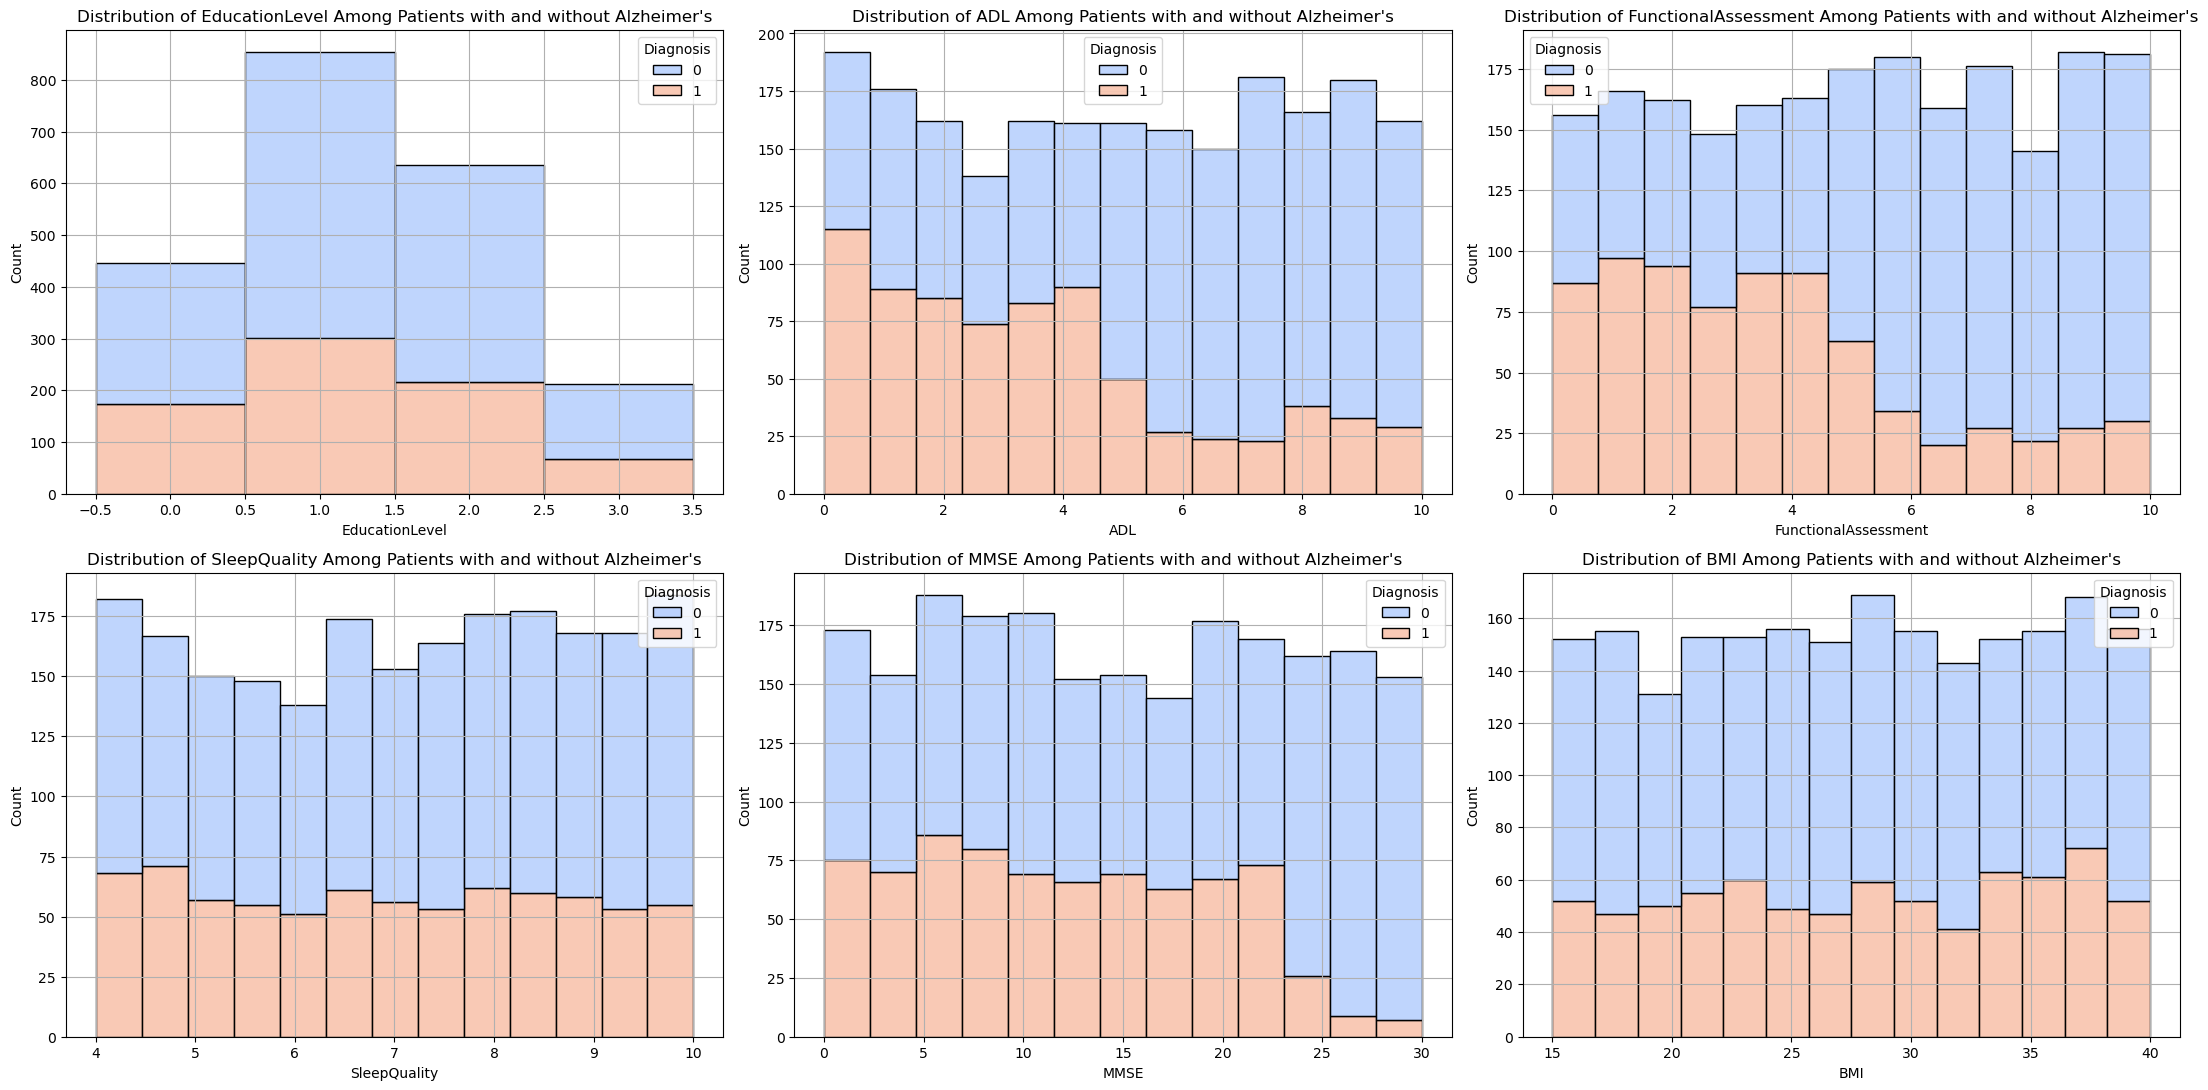

In [20]:
attributes = ['EducationLevel', 'ADL', 'FunctionalAssessment', 'SleepQuality', 'MMSE', 'BMI']

plt.figure(figsize=(22, 16))

for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i + 1)  # 2 satır, 3 sütun, i+1 numaralı grafik
    sns.histplot(data=alzheimer, x=attribute, hue='Diagnosis', multiple='stack', palette='coolwarm', kde=False)
    
    plt.title(f"Distribution of {attribute} Among Patients with and without Alzheimer's")
    plt.xlabel(attribute)
    plt.ylabel("Count")
    plt.grid(True)

plt.tight_layout() 
plt.show()

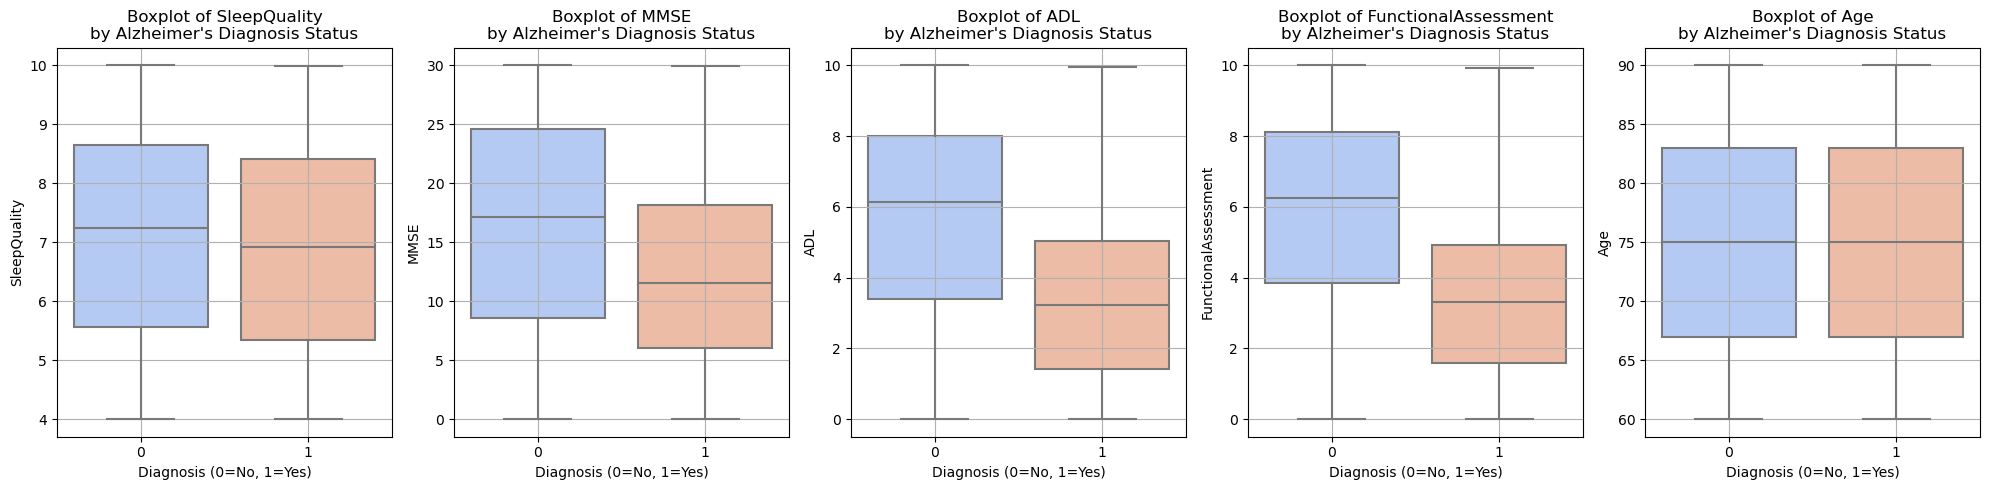

In [21]:
attributes = ['SleepQuality', 'MMSE', 'ADL', 'FunctionalAssessment', 'Age']

plt.figure(figsize=(20, 5))

for i, attribute in enumerate(attributes):
    plt.subplot(1, 5, i + 1)  # 1 satır, 5 sütun, i+1 numaralı grafik
    sns.boxplot(x='Diagnosis', y=attribute, data=alzheimer, palette='coolwarm')
    
    plt.title(f"Boxplot of {attribute}\nby Alzheimer's Diagnosis Status")
    plt.xlabel("Diagnosis (0=No, 1=Yes)")
    plt.ylabel(attribute)
    plt.grid(True)

plt.tight_layout()
plt.show()

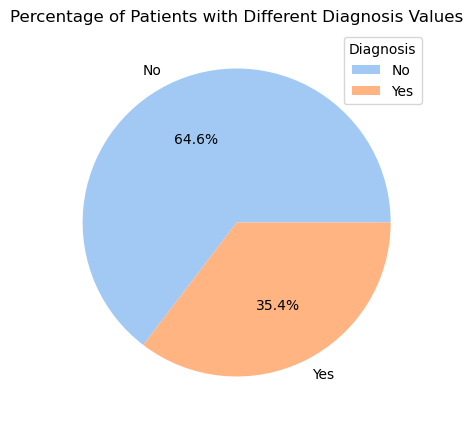

In [22]:
diagnosis_counts = alzheimer['Diagnosis'].value_counts()
labels = diagnosis_counts.index
sizes = diagnosis_counts.values

labels = ['No', 'Yes']
colors = sns.color_palette('pastel')

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Patients with Different Diagnosis Values')
plt.legend(title='Diagnosis', labels=labels, loc='upper right')
plt.show()

### Statistical Summary Based on the Dataset

- **Age**: The average age of patients in the dataset is approximately 75, with a range from 60 to 90 years. This indicates that Alzheimer's disease is more common in older individuals.
- **Gender**: The gender distribution is quite balanced, with 50.6% being female. This suggests that gender has a balanced impact on Alzheimer's diagnosis.
- **Ethnicity**: Approximately 70% of the patients belong to the same ethnic group, indicating that the effect of ethnic diversity on Alzheimer's disease needs to be investigated.
- **BMI**: The average BMI value is 27.7, and patients are generally in the overweight category. The relationship between BMI and Alzheimer's should be investigated.
- **Smoking**: About 29% of the patients are smokers. The impact of smoking on Alzheimer's diagnosis should be examined in more detail.
- **AlcoholConsumption**: The average alcohol consumption score is around 10, indicating generally low levels of alcohol consumption among the patients.
- **PhysicalActivity**: The average physical activity level is 4.9, showing that patients have a low level of physical activity. Low physical activity may increase the risk of Alzheimer's disease.
- **DietQuality**: The average diet quality is around 5. The relationship between diet quality and Alzheimer's risk should be examined.
- **FunctionalAssessment**: The average score is 5, indicating that patients experience moderate functional limitations.
- **ADL (Activities of Daily Living)**: The average ADL score is 5, indicating that patients have moderate difficulty with daily living activities.
- **MemoryComplaints**: 21% of the patients report memory complaints, which is an important indicator for Alzheimer's diagnosis.
- **BehavioralProblems**: 15.7% of the patients experience behavioral problems, which may be associated with cognitive decline.
- **Diagnosis**: Diagnosis distribution in the dataset was observed as 35.4% positive and 64.6% negative. This class imbalance must be taken into account in terms of the classification algorithm. We will use Stratified K-Fold Cross-Validation, taking into account class imbalance in the dataset.

## Feature Engineering

I will perform feature selection by looking at the correlation between the 32 features and the target, the significance score, and making forward selection.

In [23]:
X = alzheimer.drop('Diagnosis', axis=1)
y = alzheimer['Diagnosis']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Corelation

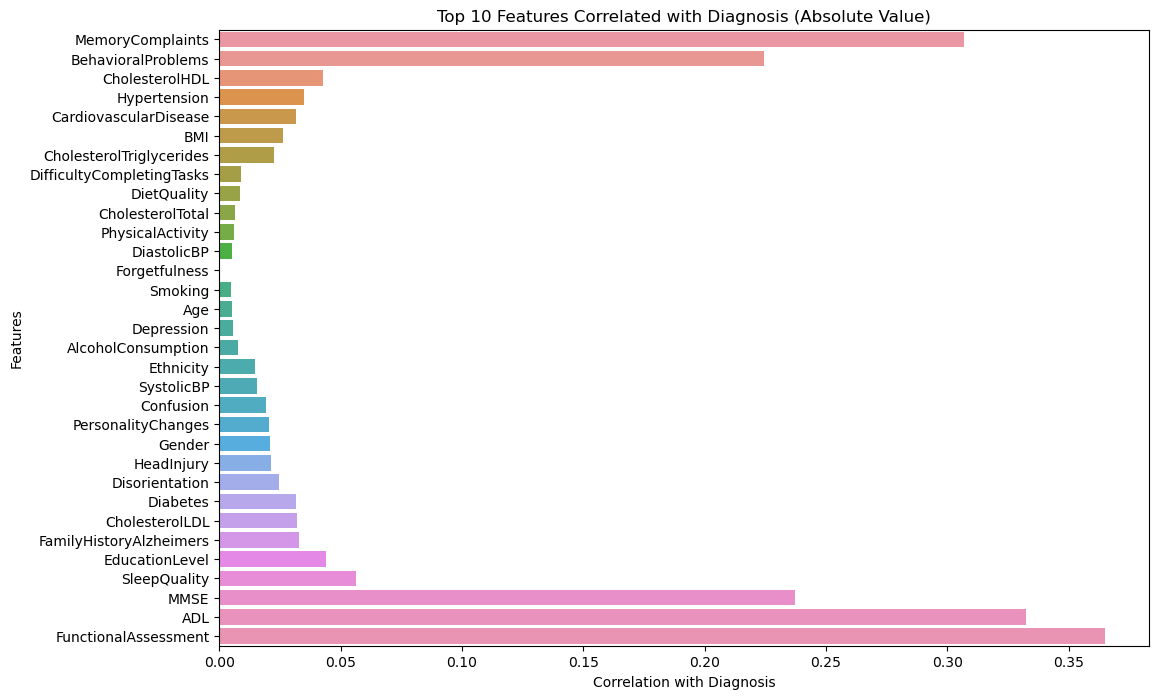

In [25]:
correlation_matrix = alzheimer.corr()

diagnosis_correlation = correlation_matrix['Diagnosis'].sort_values(ascending=False)
diagnosis_correlation = diagnosis_correlation.drop('Diagnosis')

plt.figure(figsize=(12, 8))
sns.barplot(x=diagnosis_correlation.abs(), y=diagnosis_correlation.index)
plt.title('Top 10 Features Correlated with Diagnosis (Absolute Value)')
plt.xlabel('Correlation with Diagnosis')
plt.ylabel('Features')
plt.show()

In [26]:
top_5_features_corr = diagnosis_correlation.abs().nlargest(5).index.tolist()
top_5_features_corr

['FunctionalAssessment',
 'ADL',
 'MemoryComplaints',
 'MMSE',
 'BehavioralProblems']

#### Feature Selection with Random Forest

Accuracy: 0.939 (0.017)


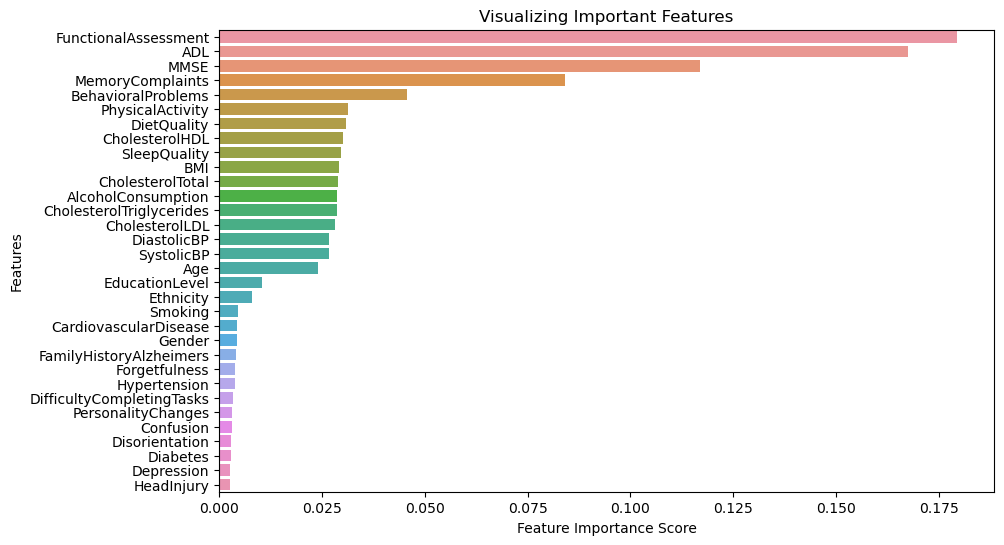

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# K Fold Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Accuracy: {mean(n_scores):.3f} ({std(n_scores):.3f})')

# Feature Importance calculation
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Let's visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [28]:
# Let's filter out those with feature importance greater than 0.04
important_features = feature_importances[feature_importances > 0.04]

# Let's return important properties as a list
important_features_list = important_features.index.tolist()

print("Important Features (Importance > 0.04):")
print(important_features_list)

Important Features (Importance > 0.04):
['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints', 'BehavioralProblems']


Let's create a correlation heatmap with important features.

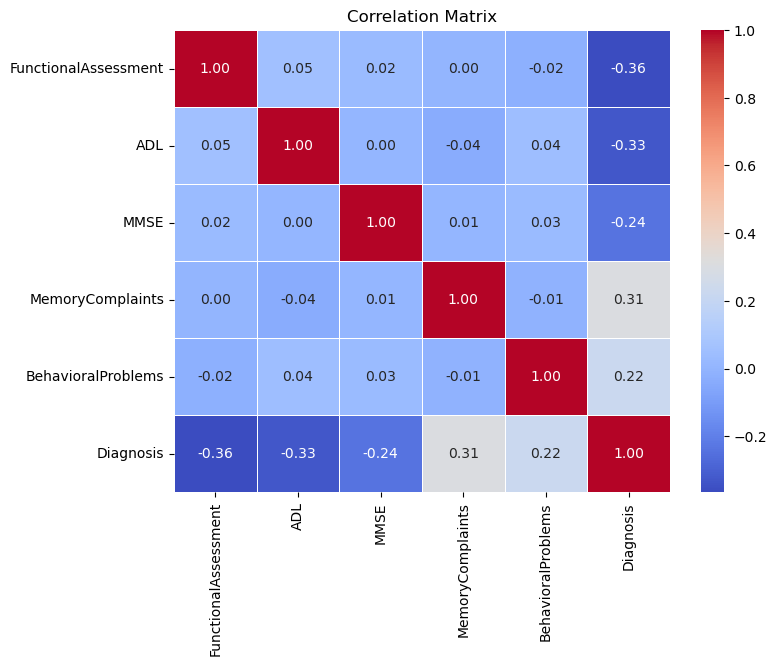

In [29]:
# Let's put together the list of important features and the diagnosis column
features_with_diagnosis = important_features_list + ['Diagnosis']

# Let's create a DataFrame containing only the important properties and the diagnosis column
alzheimer_filtered = alzheimer[features_with_diagnosis]

# Let's calculate the correlation matrix
corr_matrix = alzheimer_filtered.corr()

# Let's visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Feature Selection with Sequential Feature Selector

In [30]:
X = alzheimer.drop('Diagnosis', axis=1)
y = alzheimer['Diagnosis']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
logmodel = LogisticRegression(max_iter=1000, penalty='none')

sfs = SFS(
    logmodel,
    k_features=32,
    forward=True,
    floating=False,
    verbose=2,
    scoring='accuracy',
    n_jobs=4,
    cv=5
)

sfs = sfs.fit(X_train, y_train)

sfs.subsets_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated i

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.5s finished

[2024-08-15 14:59:43] Features: 8/32 -- score: 0.8534188758559903[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmag

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=4)]: Done  23 out of  23 | elapsed:    1.2s finished

[2024-08-15 14:59:45] Features: 10/32 -- score: 0.8540002712048274[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelma

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    1.3s finished

[2024-08-15 14:59:46] Features: 11/32 -- score: 0.8534188758559903[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelma

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
[Parallel(n_jobs=4)]: Done  19 out of  19 | elapsed:    1.6s finished

[2024-08-15 14:59:51] Features: 14/32 -- score: 0.8545816665536645[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelma

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past 

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past 

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done  14 out of  14 | elapsed:    2.2s finished

[2024-08-15 15:00:00] Features: 19/32 -- score: 0.8528340904468099[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past 

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past 

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:    1.8s finished

[2024-08-15 15:00:04] Features: 21/32 -- score: 0.8516712997491356[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will 

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed:    1.1s finished

[2024-08-15 15:00:12] Features: 26/32 -- score: 0.8493389382331007[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.wa

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

{1: {'feature_idx': (24,),
  'cv_scores': array([0.70930233, 0.7005814 , 0.7005814 , 0.68895349, 0.75510204]),
  'avg_score': 0.7109041290934979,
  'feature_names': ('MemoryComplaints',)},
 2: {'feature_idx': (22, 24),
  'cv_scores': array([0.73546512, 0.72383721, 0.72965116, 0.71511628, 0.7696793 ]),
  'avg_score': 0.7347498135466811,
  'feature_names': ('MMSE', 'MemoryComplaints')},
 3: {'feature_idx': (22, 24, 25),
  'cv_scores': array([0.76453488, 0.76162791, 0.75      , 0.73255814, 0.79591837]),
  'avg_score': 0.7609278595158994,
  'feature_names': ('MMSE', 'MemoryComplaints', 'BehavioralProblems')},
 4: {'feature_idx': (22, 23, 24, 25),
  'cv_scores': array([0.74709302, 0.75290698, 0.77906977, 0.76453488, 0.80466472]),
  'avg_score': 0.7696538748389721,
  'feature_names': ('MMSE',
   'FunctionalAssessment',
   'MemoryComplaints',
   'BehavioralProblems')},
 5: {'feature_idx': (22, 23, 24, 25, 26),
  'cv_scores': array([0.85174419, 0.83430233, 0.85755814, 0.8255814 , 0.88338192]),

In [33]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(24,)","[0.7093023255813954, 0.7005813953488372, 0.700...",0.710904,"(MemoryComplaints,)",0.029595,0.023026,0.011513
2,"(22, 24)","[0.7354651162790697, 0.7238372093023255, 0.729...",0.73475,"(MMSE, MemoryComplaints)",0.024053,0.018714,0.009357
3,"(22, 24, 25)","[0.7645348837209303, 0.7616279069767442, 0.75,...",0.760928,"(MMSE, MemoryComplaints, BehavioralProblems)",0.026727,0.020795,0.010397
4,"(22, 23, 24, 25)","[0.747093023255814, 0.752906976744186, 0.77906...",0.769654,"(MMSE, FunctionalAssessment, MemoryComplaints,...",0.026529,0.02064,0.01032
5,"(22, 23, 24, 25, 26)","[0.8517441860465116, 0.8343023255813954, 0.857...",0.850514,"(MMSE, FunctionalAssessment, MemoryComplaints,...",0.025808,0.020079,0.01004
6,"(0, 22, 23, 24, 25, 26)","[0.8633720930232558, 0.8313953488372093, 0.857...",0.851671,"(Age, MMSE, FunctionalAssessment, MemoryCompla...",0.022418,0.017442,0.008721
7,"(0, 22, 23, 24, 25, 26, 29)","[0.8633720930232558, 0.8313953488372093, 0.857...",0.853415,"(Age, MMSE, FunctionalAssessment, MemoryCompla...",0.020145,0.015674,0.007837
8,"(0, 16, 22, 23, 24, 25, 26, 29)","[0.8662790697674418, 0.8255813953488372, 0.857...",0.853419,"(Age, SystolicBP, MMSE, FunctionalAssessment, ...",0.025394,0.019757,0.009879
9,"(0, 8, 16, 22, 23, 24, 25, 26, 29)","[0.8662790697674418, 0.8255813953488372, 0.857...",0.853417,"(Age, DietQuality, SystolicBP, MMSE, Functiona...",0.023816,0.01853,0.009265
10,"(0, 8, 10, 16, 22, 23, 24, 25, 26, 29)","[0.8633720930232558, 0.8255813953488372, 0.857...",0.854,"(Age, DietQuality, FamilyHistoryAlzheimers, Sy...",0.023901,0.018596,0.009298


In [34]:
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# En yüksek avg_score değerini bul
max_avg_score = sfs_results['avg_score'].max()

# En yüksek avg_score değerine sahip satırı seç
best_features = sfs_results[sfs_results['avg_score'] == max_avg_score]

# feature_names kolonunu döndür
best_feature_names = best_features['feature_names'].values[0]

best_feature_names

('Age',
 'Gender',
 'BMI',
 'PhysicalActivity',
 'DietQuality',
 'FamilyHistoryAlzheimers',
 'Diabetes',
 'HeadInjury',
 'SystolicBP',
 'CholesterolTotal',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'PersonalityChanges',
 'DifficultyCompletingTasks')

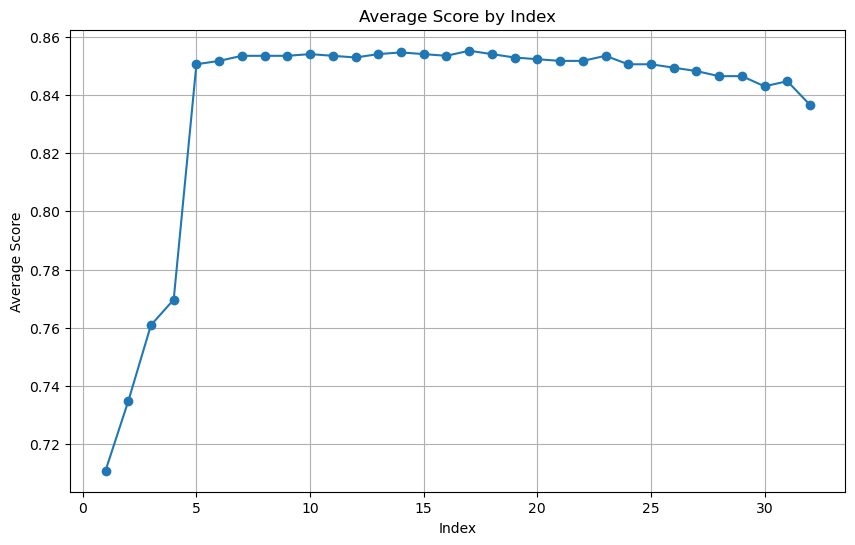

In [35]:
# X eksenine index'leri ve Y eksenine avg_score değerlerini koymak için bir grafik oluşturalım
plt.figure(figsize=(10, 6))
plt.plot(sfs_results.index, sfs_results['avg_score'], marker='o', linestyle='-')

# Grafiğe başlık ve etiketler ekleyelim
plt.title('Average Score by Index')
plt.xlabel('Index')
plt.ylabel('Average Score')

# Grafiği göster
plt.grid(True)
plt.show()

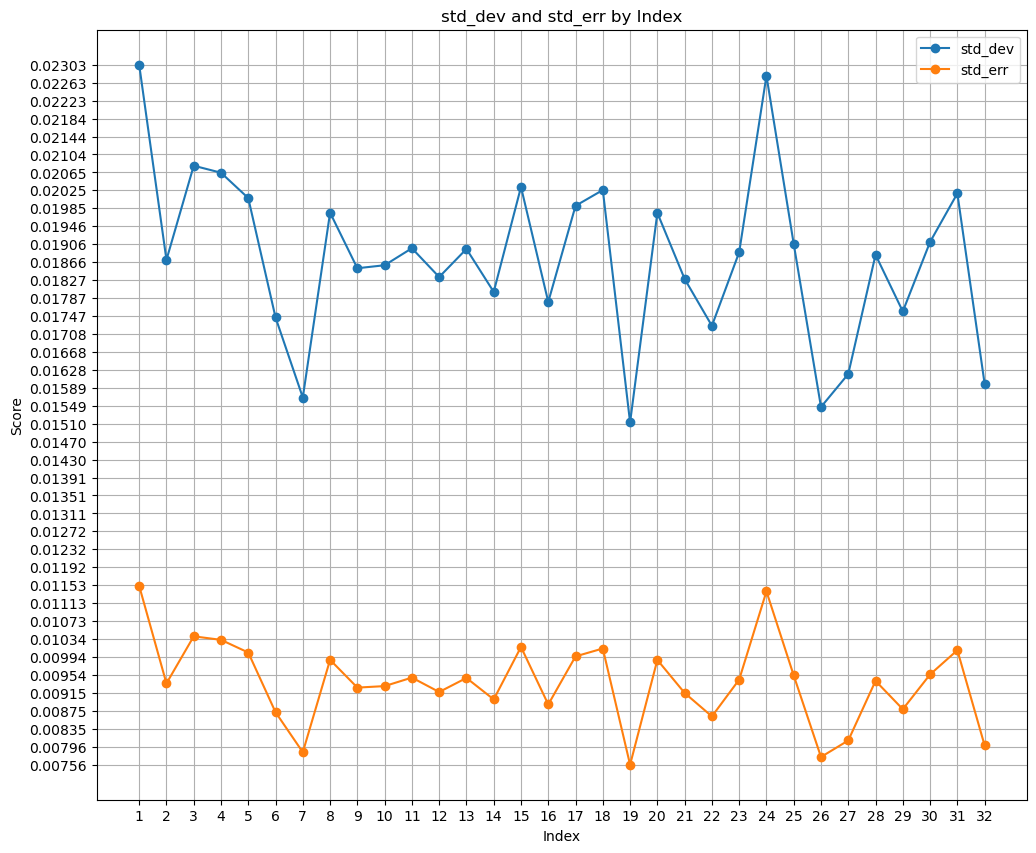

In [36]:
plt.figure(figsize=(12,10))

# İlk grafiği çiz
plt.plot(sfs_results.index, sfs_results['std_dev'], marker='o', linestyle='-', label='std_dev')

# İkinci grafiği aynı eksen üzerinde çiz
plt.plot(sfs_results.index, sfs_results['std_err'], marker='o', linestyle='-', label='std_err')

# X ekseninde tüm değerlerin gözükmesi için
plt.xticks(sfs_results.index)

plt.yticks(np.linspace(sfs_results['std_err'].min(), sfs_results['std_dev'].max(), num=40))


# Grafiğe başlık ve etiketler ekleyelim
plt.title('std_dev and std_err by Index')
plt.xlabel('Index')
plt.ylabel('Score')

# Legend ekleyelim
plt.legend()

# Grafiği göster
plt.grid(True)
plt.show()

Even if the best avg_score is the 17th, as we see in the graph, the values ​​are very close after the 5th, and if we take into account the correlation analysis and random forest, we will choose the first 5 features.

In [37]:
# 5. return feature_names in index
fifth_index_features = sfs_results.iloc[4]['feature_names']
fifth_index_features

('MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL')

In [38]:
sorted(important_features_list) == sorted(fifth_index_features)

True

In [39]:
sorted(top_5_features_corr) == sorted(fifth_index_features)

True

Because the features are the same in all three models.

## Model Selection

In [40]:
X = alzheimer[important_features_list]
y = alzheimer['Diagnosis']

In [41]:
X.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems
0,6.518877,1.725883,21.463532,0,0
1,7.118696,2.592424,20.613267,0,0
2,5.895077,7.119548,7.356249,0,0
3,8.965106,6.481226,13.991127,0,1
4,6.045039,0.014691,13.517609,0,0


Model seçimi yapacağım için train datasını bölüyorum.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(probability=True)
}

# A dictionary where we will store performance metrics
results = {model_name: {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': [], 'Confusion Matrix': []}
           for model_name in models}

# Let's do K-Fold cross validation
for train_index, valid_index in kf.split(X_train, y_train):
    X_trainv, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_trainv, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

    # Let's apply Standard Scaler (for KNN, Logistic Regression, SVM)
    scaler = StandardScaler()
    X_trainv_scaled = scaler.fit_transform(X_trainv)
    X_valid_scaled = scaler.transform(X_valid)
    
    for model_name, model in models.items():
        if model_name in ['KNeighborsClassifier', 'LogisticRegression', 'SVC']:
            model.fit(X_trainv_scaled, y_trainv)
            y_pred = model.predict(X_valid_scaled)
            y_prob = model.predict_proba(X_valid_scaled)[:, 1]
        else:
            model.fit(X_trainv, y_trainv)
            y_pred = model.predict(X_valid)
            y_prob = model.predict_proba(X_valid)[:, 1]

        # Metrikleri hesaplayalım
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred)
        recall = recall_score(y_valid, y_pred)
        f1 = f1_score(y_valid, y_pred)
        roc_auc = roc_auc_score(y_valid, y_prob)
        cm = confusion_matrix(y_valid, y_pred)

        # Sonuçları saklayalım
        results[model_name]['Accuracy'].append(accuracy)
        results[model_name]['Precision'].append(precision)
        results[model_name]['Recall'].append(recall)
        results[model_name]['F1 Score'].append(f1)
        results[model_name]['ROC AUC'].append(roc_auc)
        results[model_name]['Confusion Matrix'].append(cm)

# Let's calculate the mean and standard deviation.
final_results = {}
for model_name in results:
    final_results[model_name] = {}
    for metric in results[model_name]:
        if metric != 'Confusion Matrix':
            final_results[model_name][f'{metric} Mean'] = np.mean(results[model_name][metric])
            final_results[model_name][f'{metric} Std'] = np.std(results[model_name][metric])
        else:
            # Confusion matrix'i son fold'dan alıp string olarak kaydedelim
            final_results[model_name][metric] = str(results[model_name][metric][-1])

results_df = pd.DataFrame(final_results).T

results_df

,Accuracy Mean,Accuracy Std,Precision Mean,Precision Std,Recall Mean,Recall Std,F1 Score Mean,F1 Score Std,ROC AUC Mean,ROC AUC Std,Confusion Matrix
KNeighborsClassifier,0.920305,0.010641,0.900511,0.043243,0.874922,0.025562,0.886273,0.011477,0.94381,0.009198,[[216 6]\n [ 20 101]]
GaussianNB,0.808051,0.024999,0.744427,0.054856,0.705609,0.034389,0.722809,0.028706,0.886644,0.022472,[[204 18]\n [ 34 87]]
GradientBoostingClassifier,0.949388,0.010662,0.942486,0.032505,0.914429,0.024901,0.92756,0.014281,0.956088,0.012065,[[219 3]\n [ 15 106]]
LogisticRegression,0.847007,0.012247,0.810944,0.050408,0.748245,0.035531,0.776023,0.007542,0.906817,0.01343,[[203 19]\n [ 32 89]]
RandomForestClassifier,0.954622,0.008154,0.951442,0.020881,0.919388,0.022968,0.934765,0.011708,0.952493,0.011235,[[218 4]\n [ 13 108]]
SVC,0.91564,0.01488,0.90513,0.038331,0.853529,0.04047,0.877314,0.022018,0.9492,0.005327,[[214 8]\n [ 26 95]]


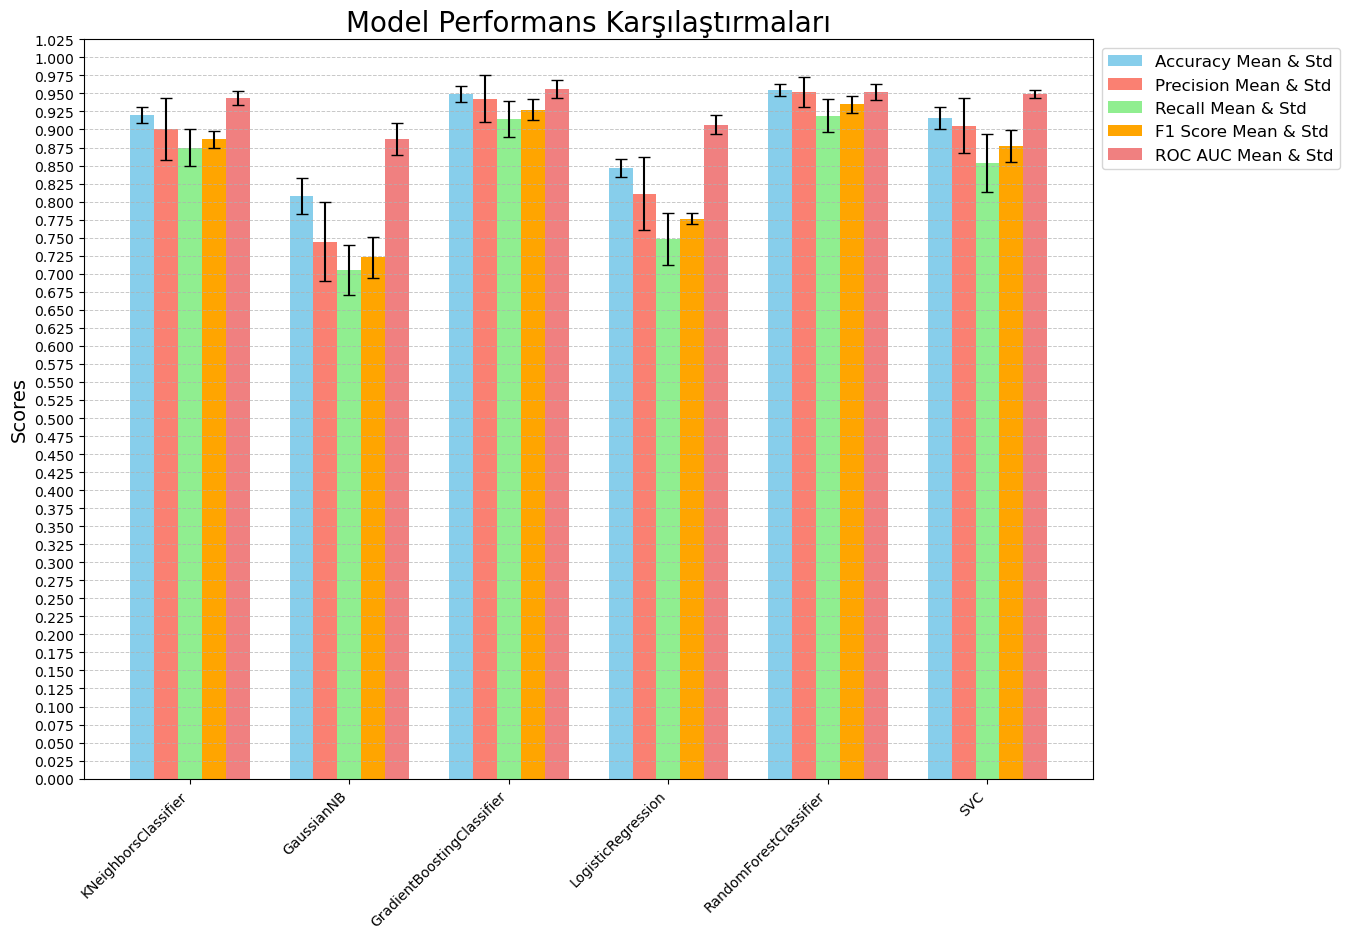

In [43]:
# Let's split the DataFrame into mean and standard deviation columns
mean_metrics = results_df[[col for col in results_df.columns if 'Mean' in col]]
std_metrics = results_df[[col for col in results_df.columns if 'Std' in col]]

# Let's define metrics and colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

plt.figure(figsize=(16, 10))
plt.title('Model Performans Karşılaştırmaları', fontsize=20)

bar_width = 0.15
index = np.arange(len(mean_metrics.index))

for i, metric in enumerate(metrics):
    mean_values = mean_metrics[f'{metric} Mean']
    std_values = std_metrics[f'{metric} Std']
    plt.bar(index + i * bar_width, mean_values, bar_width, yerr=std_values, capsize=4, color=colors[i], label=f'{metric} Mean & Std')

plt.xticks(index + bar_width * (len(metrics) - 1) / 2, mean_metrics.index, rotation=45, ha='right')

# Grid settings for y-axis (0.025 intervals)
plt.yticks(np.arange(0, 1.05, 0.025))
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

plt.ylabel('Scores', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])

plt.show()

Now let's do the model selection with GridSearchCV to be sure.

In [44]:
# Let's define a function to run GridSearchCV for each model
def optimize_hyperparameters(model, param_grid, X_train, y_train, scoring):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_

# Parameters to optimize
param_grids = {
    'KNeighborsClassifier': {
        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        'weights': ['uniform', 'distance']
    },
    'GradientBoostingClassifier': {
        'n_estimators': [50, 100, 200, 300, 400],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 4, 5, 6]
    },
    'LogisticRegression': {
        'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
        'penalty': ['none', 'l2'] 
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
}

# Scoring metrics
scoring_metrics = ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']

# A dictionary to store the results
all_optimized_models = {}

# Let's keep optimized models for each scoring metric
for scoring in scoring_metrics:
    print(f"Scoring with: {scoring}")
    optimized_models = {}

    for model_name, param_grid in param_grids.items():
        if model_name in ['KNeighborsClassifier', 'LogisticRegression', 'SVC']:
            best_model, best_params, best_score = optimize_hyperparameters(models[model_name], param_grid, X_trainv_scaled, y_trainv, scoring)
        else:
            best_model, best_params, best_score = optimize_hyperparameters(models[model_name], param_grid, X_trainv, y_trainv, scoring)
        
        optimized_models[model_name] = {
            'Best Model': best_model,
            'Best Params': best_params,
            f'Best {scoring} Score': best_score
        }

    all_optimized_models[scoring] = optimized_models

Scoring with: roc_auc
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logis

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_para

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Scoring with: accuracy
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logis

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_para

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Scoring with: precision
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logis

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_para

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Scoring with: recall
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logis

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_para

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Scoring with: f1
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logis

/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/entelektuelmaganda/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_para

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


Let's display each score in the dataframe.

In [45]:
pd.set_option('display.max_colwidth', None)

dataframes = {}

for scoring, models in all_optimized_models.items():
    results_list = []
    for model_name, model_info in models.items():
        results_list.append({
            'Model': model_name,
            'Best Params': model_info['Best Params'],
            f'Best {scoring} Score': model_info[f'Best {scoring} Score']
        })
    
    df = pd.DataFrame(results_list)
    dataframes[scoring] = df

for scoring, df in dataframes.items():
    print(f"DataFrame for {scoring} scoring metric:")
    display(df)  # Jupyter'de daha iyi görüntüleme için display() kullanıyoruz
    print("\n" + "="*50 + "\n")

DataFrame for roc_auc scoring metric:


,Model,Best Params,Best roc_auc Score
0,KNeighborsClassifier,"{'n_neighbors': 9, 'weights': 'distance'}",0.949954
1,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}",0.958216
2,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}",0.906622
3,RandomForestClassifier,"{'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}",0.956896
4,SVC,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.944499
5,GaussianNB,{'var_smoothing': 1e-05},0.892392




DataFrame for accuracy scoring metric:


,Model,Best Params,Best accuracy Score
0,KNeighborsClassifier,"{'n_neighbors': 5, 'weights': 'uniform'}",0.917889
1,GradientBoostingClassifier,"{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}",0.949860
2,LogisticRegression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.848827
3,RandomForestClassifier,"{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300}",0.951312
4,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.928058
5,GaussianNB,{'var_smoothing': 1e-05},0.819763




DataFrame for precision scoring metric:


,Model,Best Params,Best precision Score
0,KNeighborsClassifier,"{'n_neighbors': 4, 'weights': 'uniform'}",0.924860
1,GradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}",0.947059
2,LogisticRegression,"{'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}",1.000000
3,RandomForestClassifier,"{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}",0.949081
4,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.914514
5,GaussianNB,{'var_smoothing': 1e-05},0.762048




DataFrame for recall scoring metric:


,Model,Best Params,Best recall Score
0,KNeighborsClassifier,"{'n_neighbors': 9, 'weights': 'distance'}",0.870566
1,GradientBoostingClassifier,"{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}",0.919882
2,LogisticRegression,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}",0.749442
3,RandomForestClassifier,"{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 200}",0.913718
4,SVC,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.880854
5,GaussianNB,{'var_smoothing': 1e-09},0.718620




DataFrame for f1 scoring metric:


,Model,Best Params,Best f1 Score
0,KNeighborsClassifier,"{'n_neighbors': 5, 'weights': 'uniform'}",0.881712
1,GradientBoostingClassifier,"{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}",0.929168
2,LogisticRegression,"{'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}",0.777253
3,RandomForestClassifier,"{'max_depth': 30, 'max_features': 'log2', 'n_estimators': 300}",0.929950
4,SVC,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.896162
5,GaussianNB,{'var_smoothing': 1e-05},0.738556


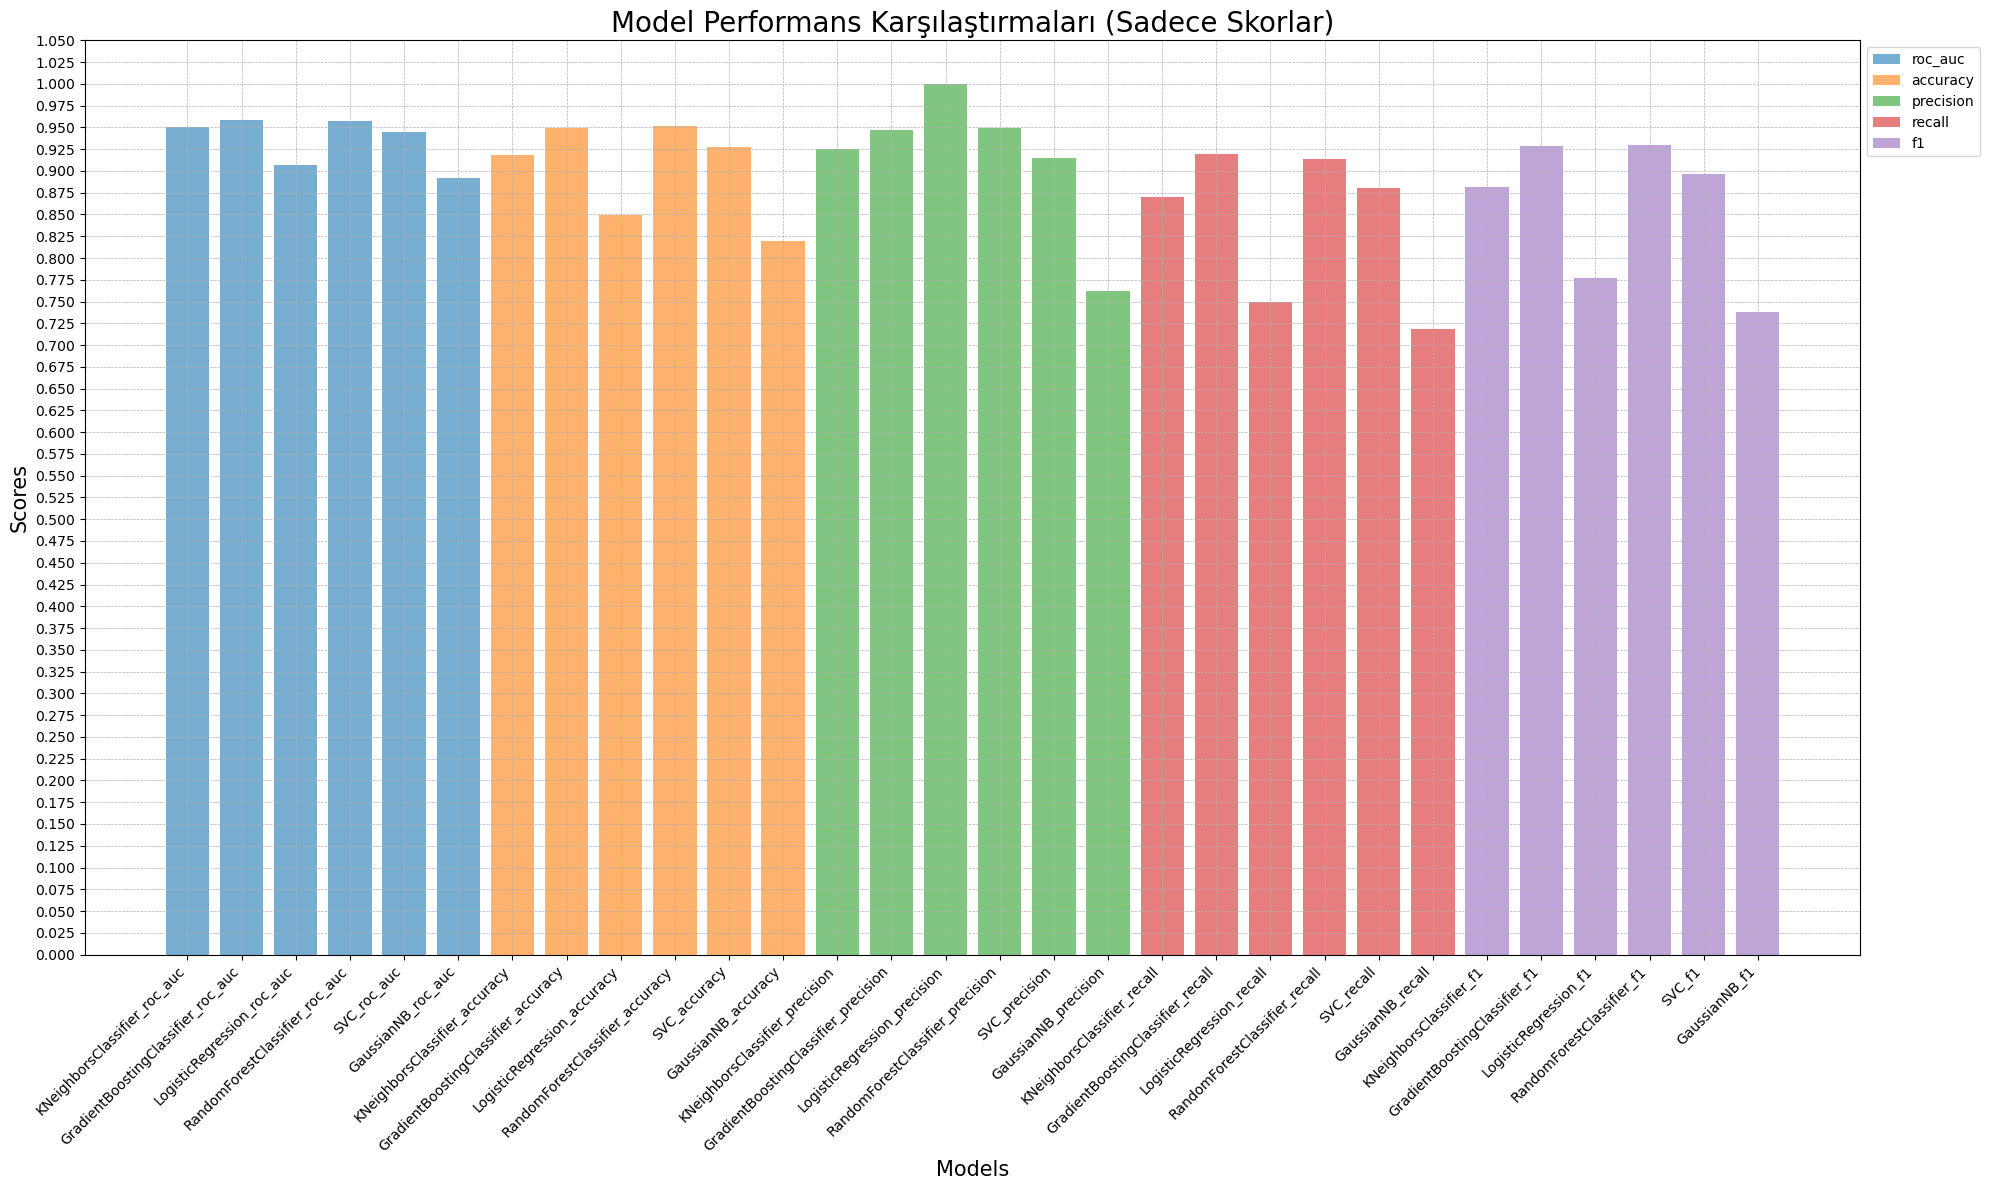

In [46]:
combined_df = pd.concat(dataframes.values(), keys=dataframes.keys()).reset_index(level=0).rename(columns={'level_0': 'Scoring Metric'})

plt.figure(figsize=(20, 12))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, scoring in enumerate(combined_df['Scoring Metric'].unique()):
    df_plot = combined_df[combined_df['Scoring Metric'] == scoring]
    plt.bar(df_plot['Model'] + f"_{scoring}", df_plot[f'Best {scoring} Score'], color=colors[i], label=f'{scoring}', alpha=0.6)

plt.title('Model Performans Karşılaştırmaları (Sadece Skorlar)', fontsize=20)
plt.ylabel('Scores', fontsize=15)
plt.xlabel('Models', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.025))

plt.tight_layout()
plt.show()

Let's visualize the result.

Gradient Boosting and Random Forest are the two models that give the best results in all criteria except Precision.

I will choose the model considering the roc_auc value.

### SELECTED MODEL: Gradient Boosting

Gradient Boosting has the highest ROC AUC score of **0.9536**, which indicates its strong ability to distinguish between positive and negative classes. It also exhibits high accuracy and other performance metrics, making it the best performing model for this task.

- **ROC AUC Score**: 0.9536
- **Importance**: The model’s high True Positive Rate (TPR) is crucial for correctly predicting the outcomes, which is important for minimizing False Negatives.

#### Best Parameters:
The best parameters for the **GradientBoostingClassifier** are:
```python
{
    'learning_rate': 0.1,
    'max_depth': 3,
    'n_estimators': 50
}

- StandardScaled gerekmiyor

In [47]:
X = alzheimer[important_features_list]
y = alzheimer['Diagnosis']

In [48]:
X.head()

,FunctionalAssessment,ADL,MMSE,MemoryComplaints,BehavioralProblems
0,6.518877,1.725883,21.463532,0,0
1,7.118696,2.592424,20.613267,0,0
2,5.895077,7.119548,7.356249,0,0
3,8.965106,6.481226,13.991127,0,1
4,6.045039,0.014691,13.517609,0,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [50]:
grboost = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
grboost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [51]:
y_pred = grboost.predict(X_test)
y_proba = grboost.predict_proba(X_test)

### Generate and visualize confusion matrix

<Figure size 400x300 with 0 Axes>

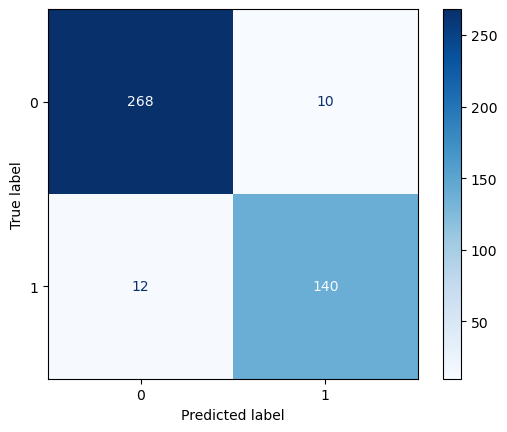

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Optimize Threshold

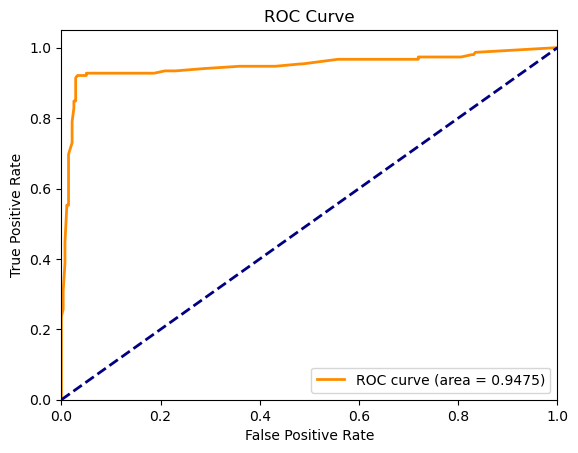

Optimal threshold: 0.6587406238967488


In [53]:
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, f1_score
threshold = 0.38270717382988123
y_pred_prob = grboost.predict_proba(X_test)[:, 1] 
y_pred = np.where(y_pred_prob > threshold, 1, 0)

y_pred = np.where(y_pred_prob > threshold, 1, 0)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold: {optimal_threshold}')

### Use optimized threshold

<Figure size 400x300 with 0 Axes>

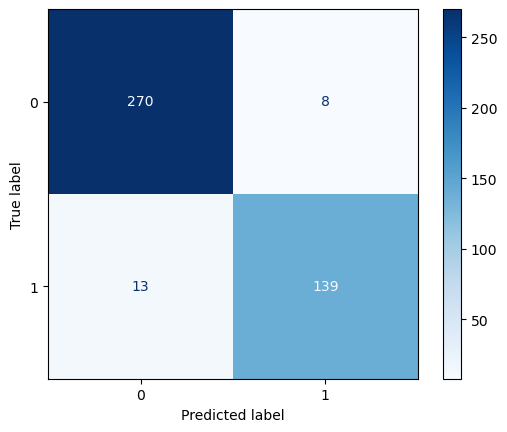

In [54]:
y_pred_prob = grboost.predict_proba(X_test)[:, 1] 

# Setting custom threshold
threshold = optimal_threshold

# Convert probabilities to binary predictions based on the threshold
y_pred = np.where(y_pred_prob > threshold, 1, 0)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix

plt.figure(figsize=(4, 3))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grboost.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()